# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [2]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

### Import Libraries and Define Auxiliary Functions


In [3]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the data set we have been created in _jupyter-labs-spacex-data-collection-api-v2.ipynb_


In [22]:
df=pd.read_csv("../data/raw/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


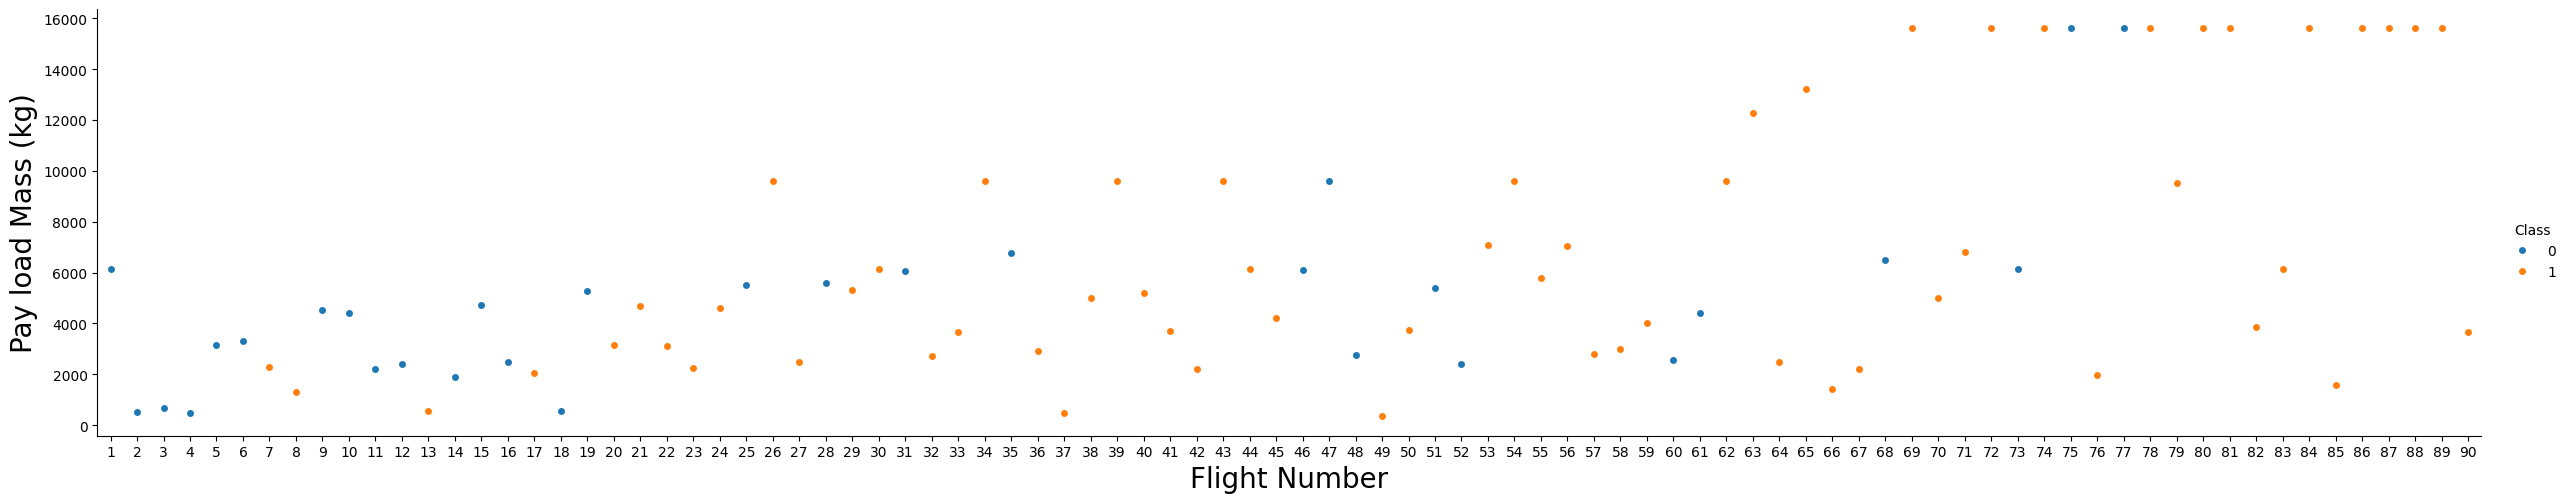

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


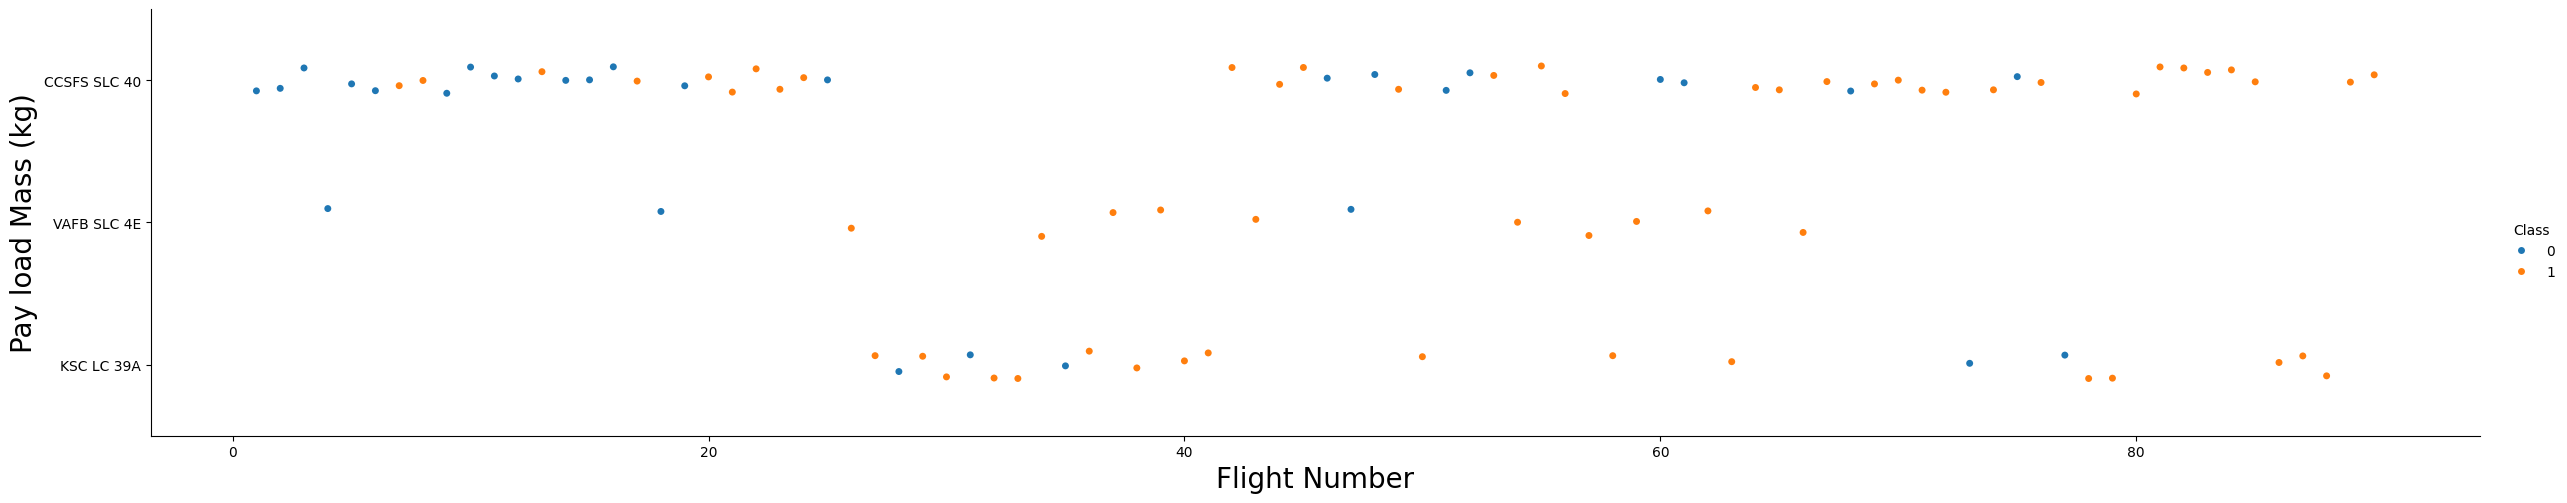

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


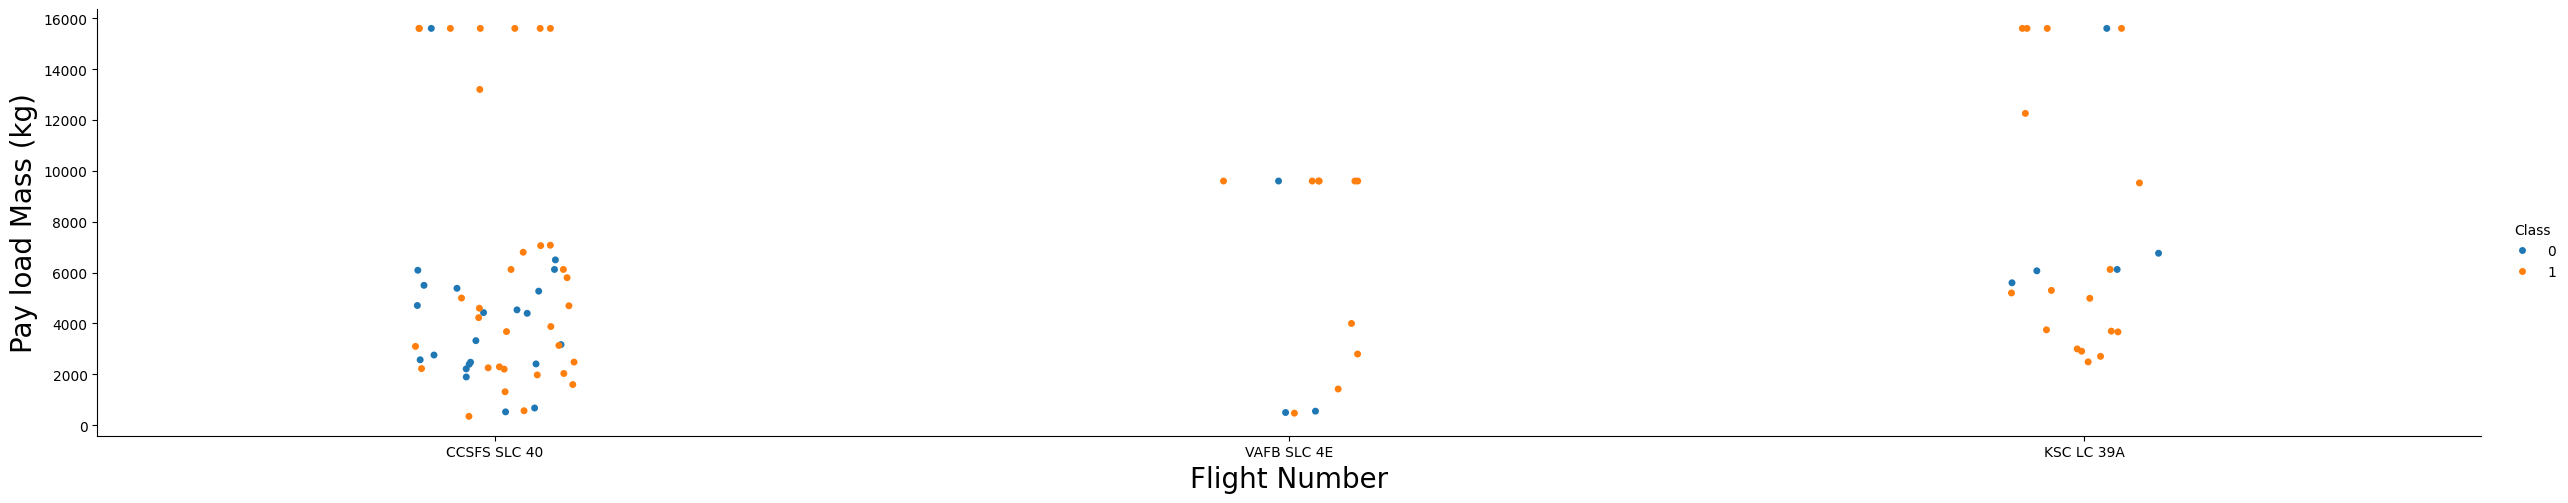

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


C:\Users\aaihs\AppData\Local\Temp\ipykernel_5384\3290769610.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y="Class", x="Orbit", data=df.groupby(['Orbit'], as_index=False).mean())


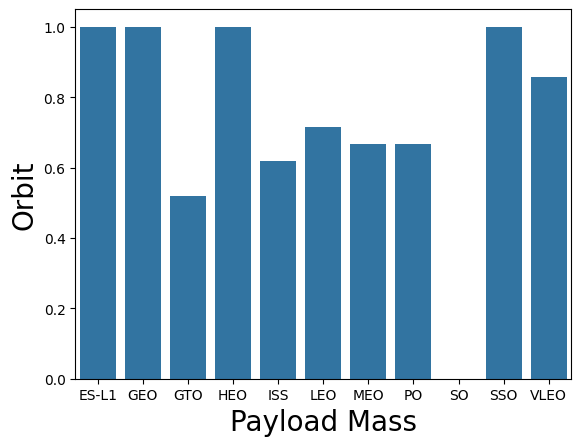

In [8]:
# Plot a bar chart of mean Payload mass by Orbit

sns.barplot(y="Class", x="Orbit", data=df.groupby(['Orbit'], as_index=False).mean())
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


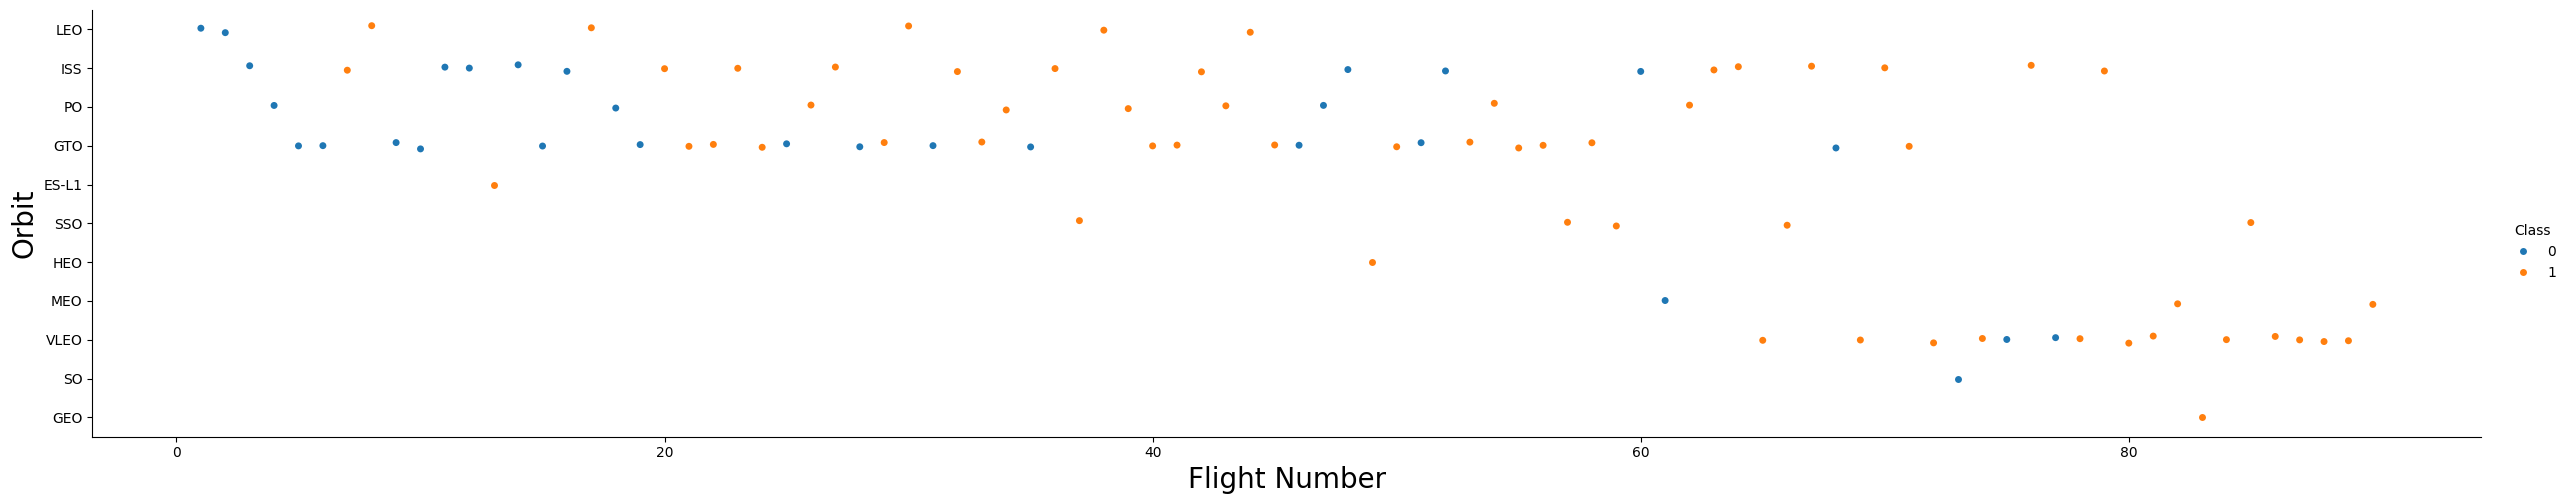

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


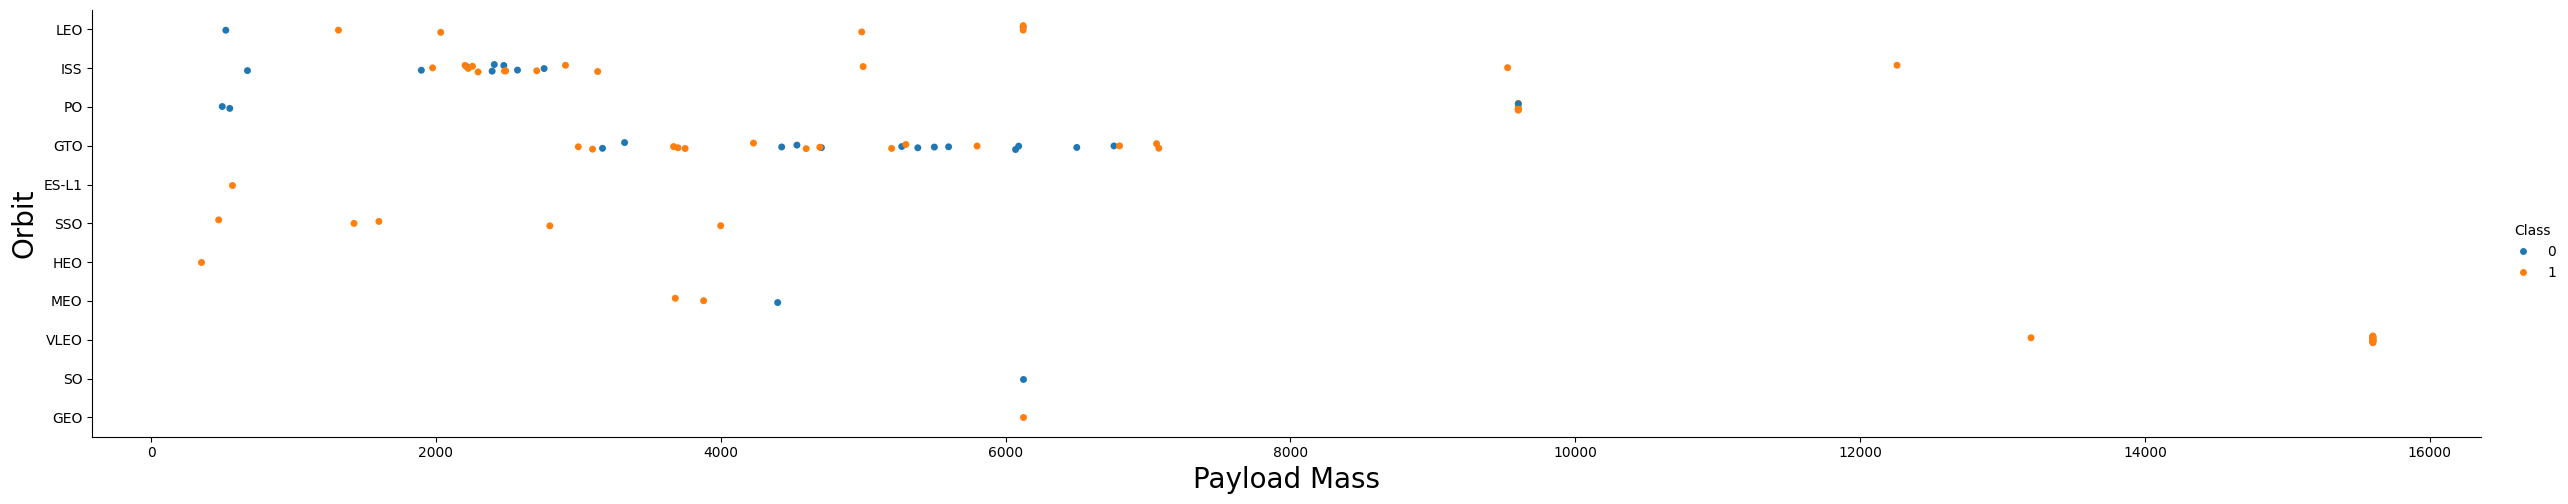

In [10]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [11]:
def Extract_year(date,X):
    for i in X["Date"]:
        year.append(i.split("-")[0])
    return year
    


<AxesSubplot: xlabel='year', ylabel='Success Rate'>

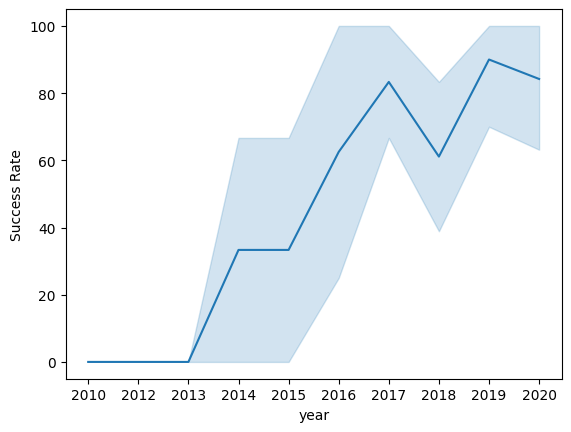

In [12]:
year = []
df["year"] = Extract_year(year,df)
df["Success Rate"] = df["Class"] * 100
sns.lineplot(data = df, x = "year", y = "Success Rate")

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [19]:
# diplsay data types of each columnd
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
year               object
Success Rate        int64
dtype: object

 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [37]:
# HINT: Use get_dummies() function on the categorical columns
df_cat = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
df_cat['GridFins'] = df_cat['GridFins'].astype(int)
df_cat['Reused'] = df_cat['Reused'].astype(int)
df_cat['Legs'] = df_cat['Legs'].astype(int)

df_cat

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,1,1,1,5.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15600.000000,3,1,1,1,5.0,13,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15600.000000,6,1,1,1,5.0,12,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15600.000000,3,1,1,1,5.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
df_cat.to_csv('../data/raw/dataset_part_2_EDA.csv', index=False)